# TRTR and TSTR Results Comparison

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('precision', 4)

## 1. Create empty dataset to save metrics differences

In [2]:
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
ml_models = ['RF','KNN','DT','SVM','MLP']

## 2. Read obtained results when TRTR and TSTR

In [3]:
FILEPATHS = {'Real' : 'RESULTS/models_results_real.csv',
            'GM' : 'RESULTS/models_results_gm.csv',
            'SDV' : 'RESULTS/models_results_sdv.csv',
            'CTGAN' : 'RESULTS/models_results_ctgan.csv',
            'WGANGP' : 'RESULTS/models_results_wgangp.csv'}

In [4]:
#iterate over all datasets filepaths and read each dataset
results_all = dict()
for name, path in FILEPATHS.items() :
    results_all[name] = pd.read_csv(path, index_col='model')
results_all

{'Real':        accuracy  precision  recall      f1
 model                                     
 RF       0.7338     0.7349  0.7338  0.7343
 KNN      0.6883     0.6782  0.6883  0.6802
 DT       0.7792     0.7835  0.7792  0.7808
 SVM      0.4610     0.5452  0.4610  0.4600
 MLP      0.6753     0.6753  0.6753  0.6753,
 'GM':        accuracy  precision  recall      f1
 model                                     
 RF       0.7013     0.6920  0.7013  0.6935
 KNN      0.6688     0.6496  0.6688  0.6456
 DT       0.5649     0.5844  0.5649  0.5719
 SVM      0.4286     0.5013  0.4286  0.4306
 MLP      0.6299     0.6314  0.6299  0.6306,
 'SDV':        accuracy  precision  recall      f1
 model                                     
 RF       0.7208     0.7230  0.7208  0.6886
 KNN      0.6883     0.6932  0.6883  0.6312
 DT       0.7143     0.7070  0.7143  0.7086
 SVM      0.4545     0.5160  0.4545  0.4624
 MLP      0.6494     0.6367  0.6494  0.6402,
 'CTGAN':        accuracy  precision  recall      f1

## 3. Calculate differences of models

In [5]:
metrics_diffs_all = dict()
real_metrics = results_all['Real']
columns = ['data','accuracy_diff','precision_diff','recall_diff','f1_diff']
metrics = ['accuracy','precision','recall','f1']

for name in SYNTHESIZERS :
    syn_metrics = results_all[name]
    metrics_diffs_all[name] = pd.DataFrame(columns = columns)
    for model in ml_models :
        real_metrics_model = real_metrics.loc[model]
        syn_metrics_model = syn_metrics.loc[model]
        data = [model]
        for m in metrics :
            data.append(abs(real_metrics_model[m] - syn_metrics_model[m]))
        metrics_diffs_all[name] = metrics_diffs_all[name].append(pd.DataFrame([data], columns = columns))
metrics_diffs_all

{'GM':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.0325          0.0429       0.0325   0.0408
 0  KNN         0.0195          0.0286       0.0195   0.0346
 0   DT         0.2143          0.1991       0.2143   0.2089
 0  SVM         0.0324          0.0439       0.0324   0.0294
 0  MLP         0.0454          0.0439       0.0454   0.0447,
 'SDV':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.0130          0.0119       0.0130   0.0457
 0  KNN         0.0000          0.0150       0.0000   0.0490
 0   DT         0.0649          0.0765       0.0649   0.0722
 0  SVM         0.0065          0.0292       0.0065   0.0024
 0  MLP         0.0259          0.0386       0.0259   0.0351,
 'CTGAN':   data  accuracy_diff  precision_diff  recall_diff  f1_diff
 0   RF         0.2857          0.0243       0.2857   0.3603
 0  KNN         0.2143          0.0568       0.2143   0.2331
 0   DT         0.3441          0.2098       0.3441   0.3833


## 4. Compare absolute differences

### 4.1. Barplots for each metric

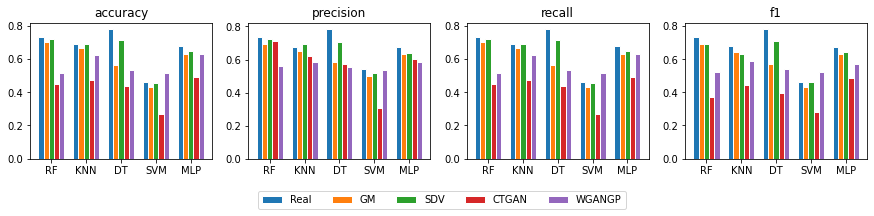

In [6]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
metrics_diff = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

barwidth = 0.15

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 2.5))
axs_idxs = range(4)
idx = dict(zip(metrics + metrics_diff,axs_idxs))

for i in range(0,len(metrics)) :
    data = dict()
    y_pos = dict()
    y_pos[0] = np.arange(len(ml_models))
    ax = axs[idx[metrics[i]]]
    
    for k in range(0,len(DATA_TYPES)) :
        generator_data = results_all[DATA_TYPES[k]] 
        data[k] = [0, 0, 0, 0, 0]
        
        for p in range(0,len(ml_models)) :
            data[k][p] = generator_data[metrics[i]].iloc[p]
            
        ax.bar(y_pos[k], data[k], color=colors[k], width=barwidth, edgecolor='white', label=DATA_TYPES[k])
        y_pos[k+1] = [x + barwidth for x in y_pos[k]]
        
    ax.set_xticks([r + barwidth*2 for r in range(len(ml_models))])
    ax.set_xticklabels([])
    ax.set_xticklabels(ml_models, fontsize=10)
    ax.set_title(metrics[i], fontsize=12)
    
ax.legend(DATA_TYPES, ncol=5, bbox_to_anchor=(-0.3, -0.2))
fig.tight_layout()
#fig.suptitle('Models performance comparisson Boxplots (TRTR and TSTR) \n Dataset F - Indian Liver Patient', fontsize=18)
fig.savefig('RESULTS/MODELS_METRICS_BARPLOTS.svg', bbox_inches='tight')

### 4.2. Metrics differences lineplots

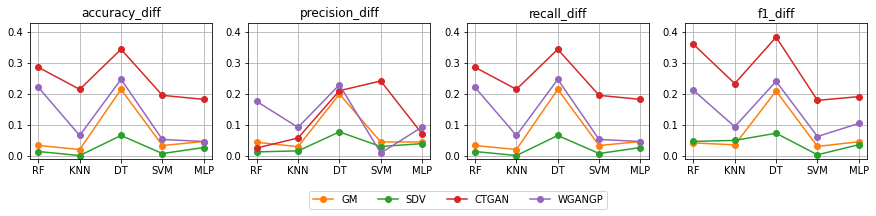

In [7]:
metrics = ['accuracy_diff', 'precision_diff', 'recall_diff', 'f1_diff']
colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,2.5))
axs_idxs = range(4)
idx = dict(zip(metrics,axs_idxs))

for i in range(0,len(metrics)) :
    data = dict()
    ax = axs[idx[metrics[i]]]
    
    for k in range(0,len(SYNTHESIZERS)) :
        generator_data = metrics_diffs_all[SYNTHESIZERS[k]] 
        data[k] = [0, 0, 0, 0, 0]
        
        for p in range(0,len(ml_models)) :
            data[k][p] = generator_data[metrics[i]].iloc[p]
            
        ax.plot(data[k], 'o-', color=colors[k], label=SYNTHESIZERS[k])
        
    ax.set_xticks(np.arange(len(ml_models)))
    ax.set_xticklabels(ml_models, fontsize=10)
    ax.set_title(metrics[i], fontsize=12)
    ax.set_ylim(bottom=-0.01, top=0.43)
    ax.grid()
    
ax.legend(SYNTHESIZERS, ncol=5, bbox_to_anchor=(-0.4, -0.2))
fig.tight_layout()
#fig.suptitle('Models performance comparisson Boxplots (TRTR and TSTR) \n Dataset F - Indian Liver Patient', fontsize=18)
fig.savefig('RESULTS/MODELS_METRICS_DIFFERENCES.svg', bbox_inches='tight')